<a href="https://colab.research.google.com/github/sethporter903/Neural-Network/blob/main/Neural_Network_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem  1:
 - 2 Variable Regression using Keras/TensorFlow
 - Using SKlearn model by using the inverse of a matrix method. It is not visible to us, but the matrix inverse method going on in the backend of SKlearn

In [ ]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt
# Create regression model
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score 

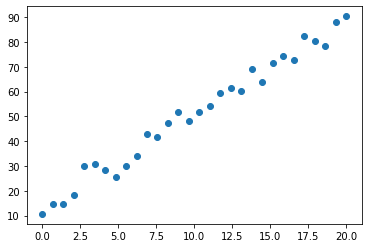

In [ ]:
n_samples = 30
train_x = np.linspace(0,20,n_samples)
train_y = 3.7 * train_x + 14 + 4 * np.random.randn(n_samples)
plt.plot(train_x, train_y,'o')

In [ ]:
X_sklearn = train_x.reshape(-1,1)
Y_sklearn = train_y.reshape(-1,1)


In [ ]:
model_object = linear_model.LinearRegression()

In [ ]:
model_object.fit(X_sklearn, Y_sklearn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# The coefficients
print('Coefficients: \n', model_object.coef_)

Coefficients: 
 [[3.83473767]]


In [ ]:
# The Y-intercept
print('Y_intercept: \n', model_object.intercept_)

Y_intercept: 
 [12.56103713]


##Building Keras Model

In [ ]:
import keras as ks 
from keras.models import Sequential 
from keras.layers import Dense, Activation

In [ ]:
# build the model
# The Sequntial model is used for cases where each LAYER has one input and # one output.  
# It is used for most standard NNs, where there is NO branching
model = Sequential()

Below represents the activation function. 
- The activation function tells you how to handle the forward propagation. (The forwrad progress of data)
- Dense 1 means that it's a one layered Neural network. (means there are 0 hidden layers 
Dense(3 would indicate 2 hidden layers. Dense 1 indicates 0 hidden layers)
- activation = 'linear'  is the activation function that makes changes to the forward propagation process if necessary. EX- For a binary classifier of some kind like a logisitical regression model of outputs of 0 or 1 we would use activation = sigmoid(Remember the forward propagation process is only the weighted sum (weights and biases included) of the inputs 
- input_dim = is the number of input nodes
- kernel_initializer = is how to initially guess your weights and biases before you start doing any epochs at all


In [ ]:
model.add(Dense(1,activation='linear',kernel_initializer='normal',input_dim=1))

- Loss = cost function (A represnentation of erro) 
  - Residiual sum of squares is another type of cost function
- Optimizer = gradient based optimization function is how we get to the final answer from the kernel initializer 
  - Kernel initializer is the just the initial guess and the optimizer finalizes it by looking at the data given by the input and output data from the kernel initializer
-

In [ ]:
#compile model
model.compile(loss='mean_squared_error', optimizer= 'adam',metrics=['mse'])

- 'Param#' is the number of the weights and biased combined (There is usually only 1 bias per node) Weights is the connection between nodes)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit the model
x = np.array(train_x)
y = np.array(train_y)

In [ ]:
epochs = 10000
hist = model.fit(x, y, epochs = epochs, verbose = 0)

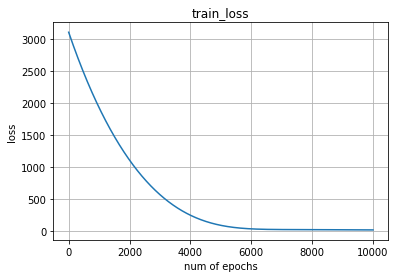

In [ ]:
#visualize the loss
train_lost = hist.history['loss']
xc = range(epochs)
plt.plot(xc, train_lost)
plt.figure(1,figsize= (7,5))
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.style.use(['ggplot'])

In [ ]:
print(hist)

In [ ]:
# Print the weights and biases of all the neurons in the Neural Network
# Does not post the values of the output layer
#Layer number = 0 is the input layer
for layerNum, layer in enumerate(model.layers):
  print("Layer Number = ",layerNum)
  print("Weight Values = ",layer.get_weights()[0])
  print("Bias Values = ",layer.get_weights()[1])                                                                                                                                                                                                                                                                                                

Layer Number =  0
Weight Values =  [[4.3116612]]
Bias Values =  [6.18437]


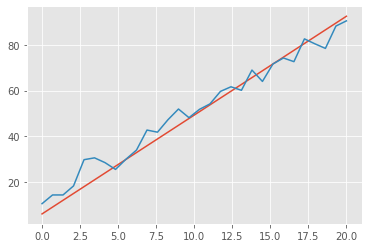

In [ ]:
pred = model.predict(train_x) 
plt.plot(train_x, pred, train_x, train_y)

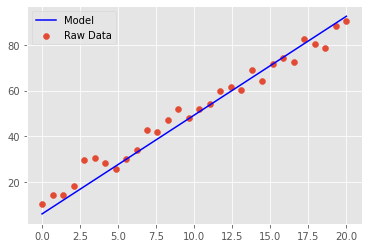

In [ ]:
pred = model.predict(train_x)
plt.plot(train_x, pred, 'b')
plt.scatter(train_x, train_y)
plt.legend(("Model","Raw Data"))


In [ ]:
test_x = [15]
val = model.predict(test_x)
print(val)

[[70.85929]]


#Problem#2: Multivariable Regression using Keras/TensorFlow

In [ ]:
#import libraries
import pandas as pd
from sklearn import preprocessing
#file handling
from google.colab import files
import io
uploaded = files.upload()
kc_house_data = pd.read_csv(io.BytesIO(uploaded['00 kc_house_data.csv'])) 

Saving 00 kc_house_data.csv to 00 kc_house_data (6).csv


Feature scaling method - Rescaling (min-max normalization):
$$x' = {x-min(x)\over max(x)-min(x)} $$ 
This normalization method scales all values between 0 and 1. You can hard code this in python as:
```python
featuresMin = features.min(axis=0)
featuresMax = features.max(axis=0)
featuresScale2 = (features - featuresMin)/(featuresMax - featuresMin) 
 ```  
Scikit-Learn's preprocessing library does it the way shown above, but it is easier to use the preprocessing library and minmax_scale method instead of using the equation. 

In [ ]:
featuresScale = preprocessing.minmax_scale(kc_house_data[['bedrooms','sqft_living']])
labelScale = preprocessing.minmax_scale(kc_house_data[['price']])

## Multi Regression Scikit ModeL

The equation below is is the multi linear regression equation
  - In neural networks the b value is the bias 
  - The weights are M1,M2 ect.
  - X1 = bedrooms
  - X2 = squft_living
  - Y = price
$$Y = m_1X_1 + m_2X_2 + b$$

In [ ]:
MR_model_object = linear_model.LinearRegression()
MR_model_object.fit(featuresScale,labelScale)
print(MR_model_object.intercept_)
print(MR_model_object.coef_)

[0.01252649]
[[-0.24697745  0.54555018]]


#Multi Regression Keras Model

In [ ]:
MR_model = Sequential() 

In [ ]:
MR_model.add(Dense(1,activation='linear',kernel_initializer='normal',input_dim=2))

In [ ]:
#compile model
MR_model.compile(loss='mean_squared_error', optimizer= 'adam',metrics=['mse'])

In [ ]:
#fit the model
MR_epochs = 20
hist = MR_model.fit(featuresScale, labelScale, epochs = MR_epochs, verbose = 0)


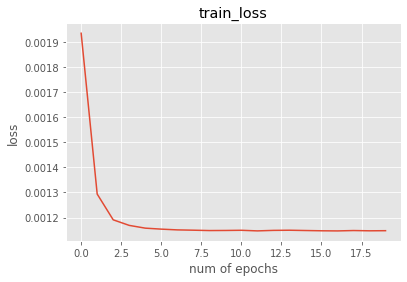

In [ ]:
#visualize the loss
train_lost = hist.history['loss']
xc = range(MR_epochs)
plt.plot(xc, train_lost)
plt.figure(1,figsize= (7,5))
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.style.use(['ggplot'])

In [ ]:
# Print the weights and biases of all the neurons in the Neural Network
# Does not post the values of the output layer
#Layer number = 0 is the input layer
for layerNum, layer in enumerate(MR_model.layers):
  print("Layer Number = ",layerNum)
  print("Weight Values = ",layer.get_weights()[0])
  print("Bias Values = ",layer.get_weights()[1])       

Layer Number =  0
Weight Values =  [[-0.24777375]
 [ 0.54570407]]
Bias Values =  [0.01236731]
